<a href="https://colab.research.google.com/github/arunklenin97/AmExpert-2021/blob/main/Advance_House_Price_Prediction_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
import statsmodels.api as sm
import math
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.pandas.set_option('display.max_columns',None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Advance House Price/train.csv')
print(data.shape)

(1460, 81)


In [ ]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [ ]:
print(data.shape)
data.info()

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

In [ ]:
f=['Neighborhood','Condition1','Condition2','Exterior1st','Exterior2nd']

In [ ]:
# condition2=data.Condition2.map(data.Condition2.value_counts().to_dict())
# data.Exterior1st=data.Exterior1st.map(data.Exterior1st.value_counts().to_dict())
# data.Exterior2nd=data.Exterior2nd.map(data.Exterior2nd.value_counts().to_dict())

In [ ]:
data.describe()
# df=data.iloc[1314:,:]
S=[]
for i in range(0,1314):
    if data.iloc[i,:].isnull().sum()<10:
        S.append(i)

In [ ]:
# data=data.iloc[S,:]
# data=pd.concat([data,df],axis="rows")

In [ ]:
print(data.shape)
data.head()
train_len=data.shape[0]

(1460, 81)


## Drop columns having high missing values

In [ ]:
# data.drop(['Alley','PoolQC','MiscFeature','Fence','FireplaceQu'],axis=1,inplace=True)
data.drop(['Alley','PoolQC','MiscFeature','Fence'],axis=1,inplace=True)

## Missing Values

In [ ]:
# finding percentages of Nan values in each feacture
# list of features having missing values
features_with_nan=[features for features in data.columns if data[features].isnull().sum()>=1]

### The features with missing values and their percentages

In [ ]:
for feature in features_with_nan:
    print(feature, np.round(data[feature].isnull().mean(),4),  ' % of missing values')
#     print(feature,data[feature].isnull().sum(),'number of missing values')

LotFrontage 0.1774  % of missing values
MasVnrType 0.0055  % of missing values
MasVnrArea 0.0055  % of missing values
BsmtQual 0.0253  % of missing values
BsmtCond 0.0253  % of missing values
BsmtExposure 0.026  % of missing values
BsmtFinType1 0.0253  % of missing values
BsmtFinType2 0.026  % of missing values
Electrical 0.0007  % of missing values
FireplaceQu 0.4726  % of missing values
GarageType 0.0555  % of missing values
GarageYrBlt 0.0555  % of missing values
GarageFinish 0.0555  % of missing values
GarageQual 0.0555  % of missing values
GarageCond 0.0555  % of missing values


### Before handling it, find the relationship with dependent variable

In [ ]:
for feature in features_with_nan:
    df = data.copy()
    # make a variable that indicates

### So the missing values have considerable dependancy

# Numerical Variables

In [ ]:
num_features=[feature for feature in data.columns if data[feature].dtypes!='O']
print('Number of numerical vairables are:', len(num_features))

Number of numerical vairables are: 38


In [ ]:
data[num_features].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


### date time variables must be handled

In [ ]:
year_feature=[feature for feature in num_features if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [ ]:
for feature in year_feature:
    print(feature, data[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'Price vs year sold')

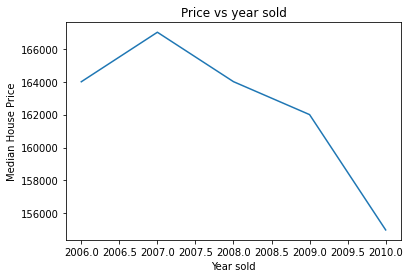

In [ ]:
# check relation between date time variables and salesprice
data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year sold')
plt.ylabel('Median House Price')
plt.title('Price vs year sold')

In [ ]:
# comparing all year feature and price
# for feature in year_feature:
# nd yearsold
    
#     plt.scatter(dataset[feature],dataset['SalePrice'])
#     plt.xlabel(feature)
#     plt.ylabel('SalePrice')
#     plt.show()


## Finding discrete variables in numerical features

In [ ]:
disc_feature=[feature for feature in num_features if len(data[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(disc_feature)))

Discrete Variables Count: 17


In [ ]:
disc_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [ ]:
data[disc_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


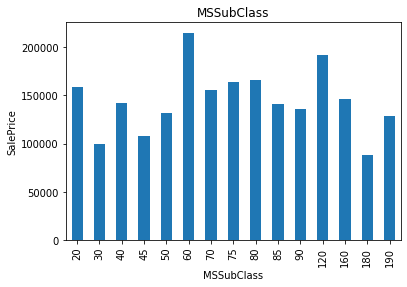

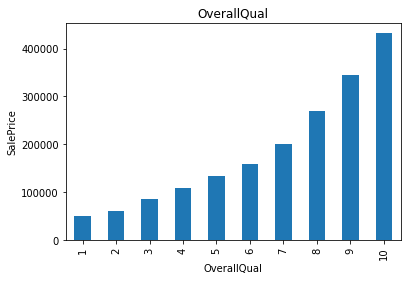

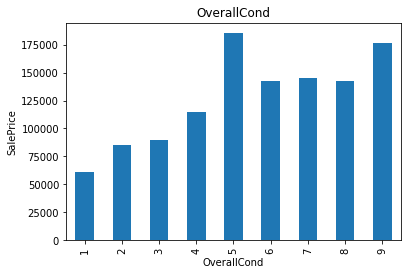

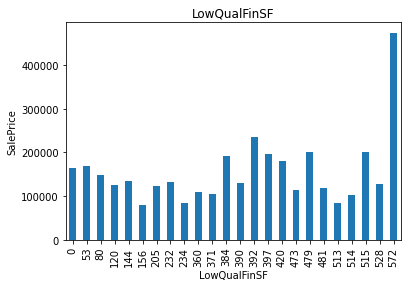

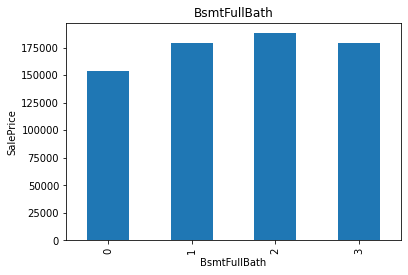

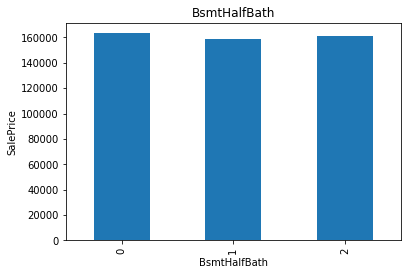

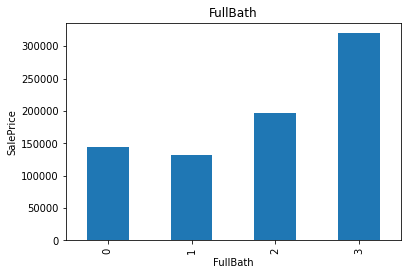

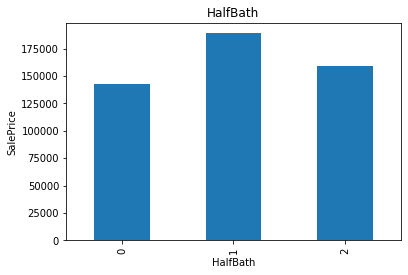

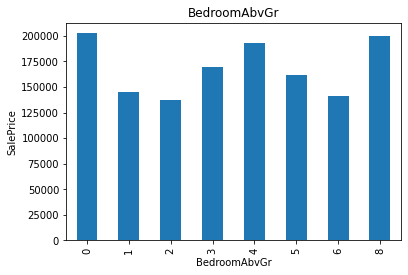

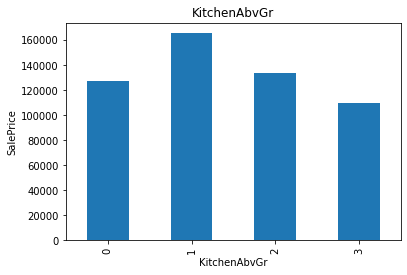

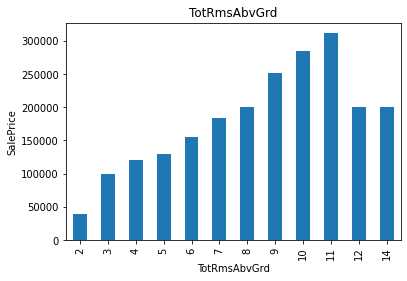

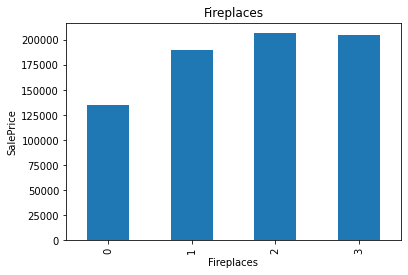

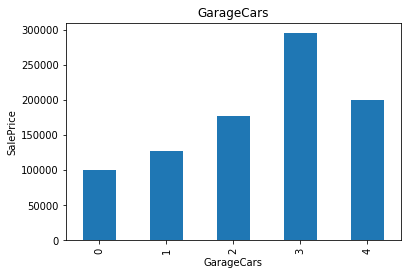

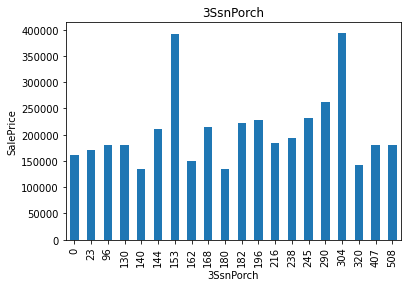

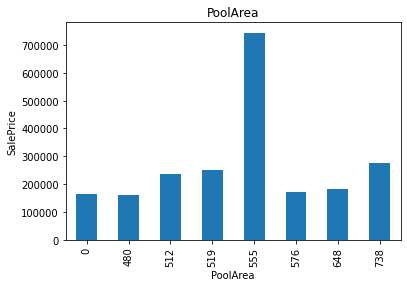

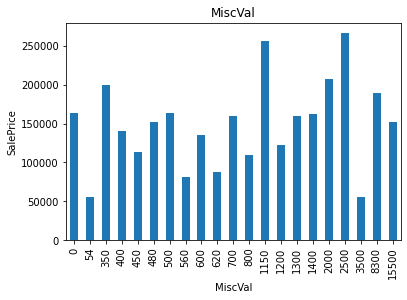

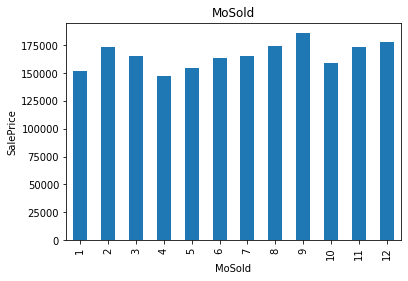

In [ ]:
for feature in disc_feature:
    data1=data.copy()
    data1.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

## Continuous variables

In [ ]:
cont_feature=[feature for feature in num_features if feature not in disc_feature+year_feature+['Id']]
cont_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [ ]:
print(len(cont_feature))

16


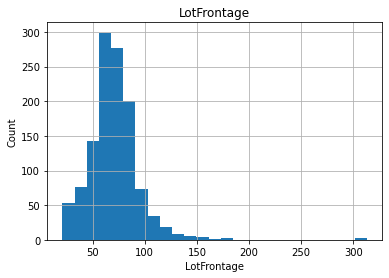

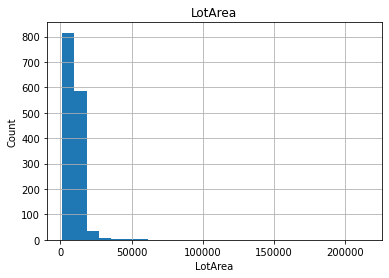

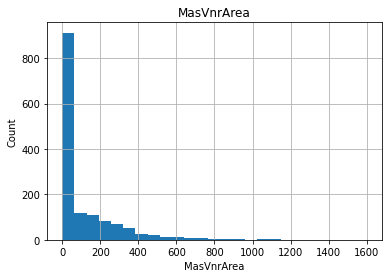

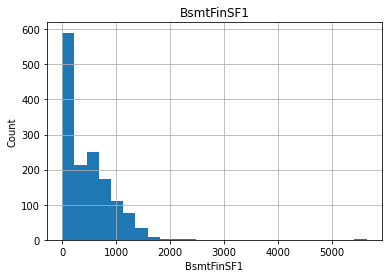

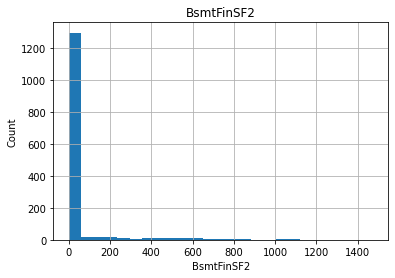

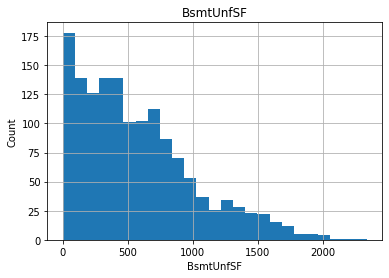

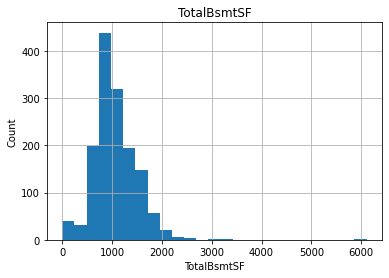

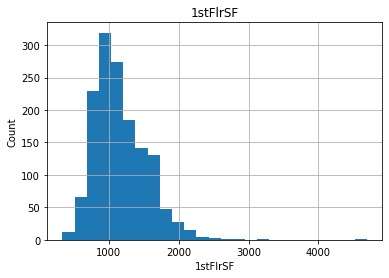

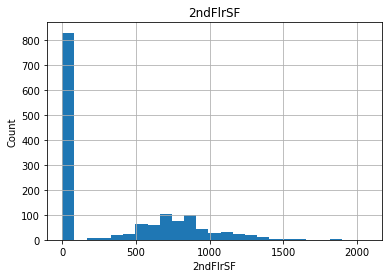

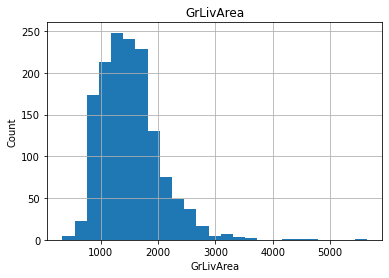

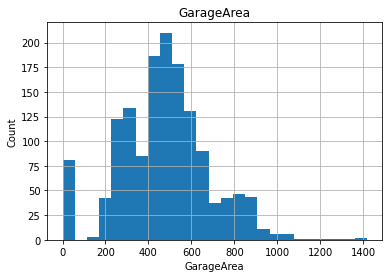

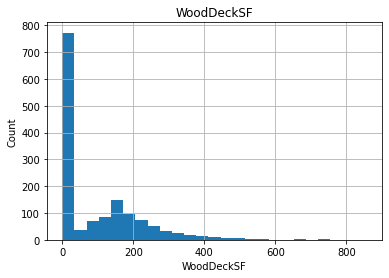

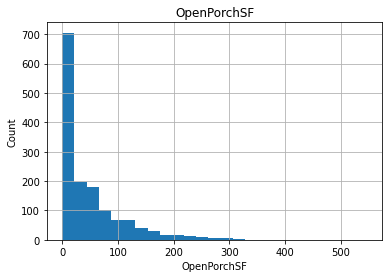

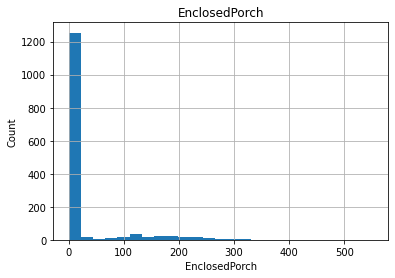

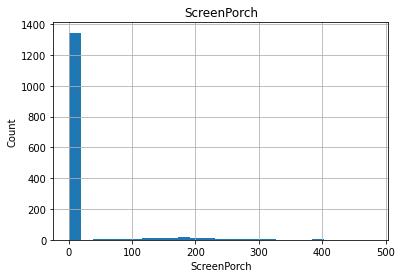

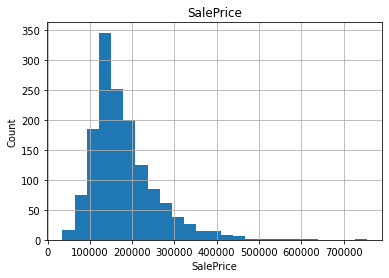

In [ ]:
for feature in cont_feature:
    data1=data.copy()
    data1[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

## some of the cont_feature are skewed

## log transformation on skewed features

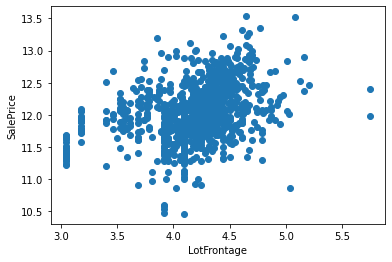

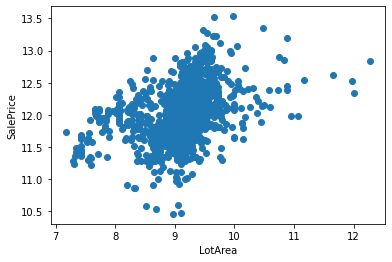

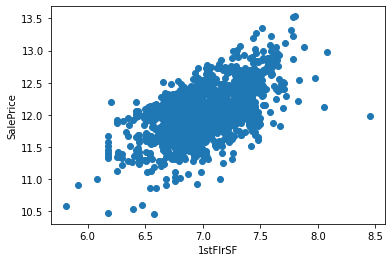

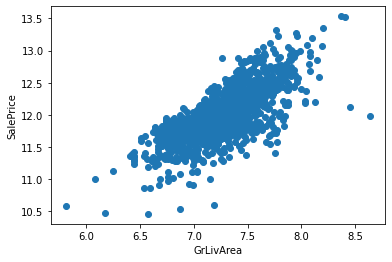

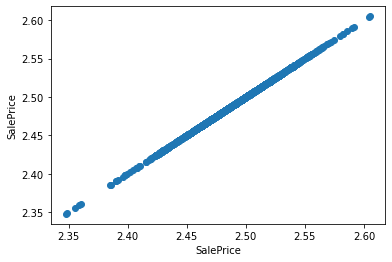

In [ ]:

for feature in cont_feature:
    df=data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df['SalePrice']=np.log(df['SalePrice'])
        plt.scatter(df[feature],df['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()
    

## Outliers

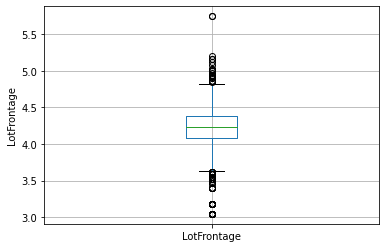

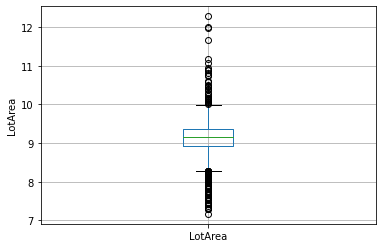

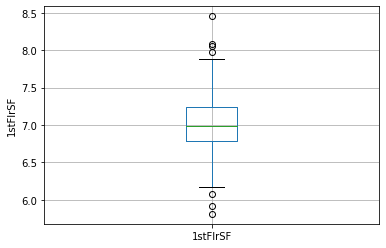

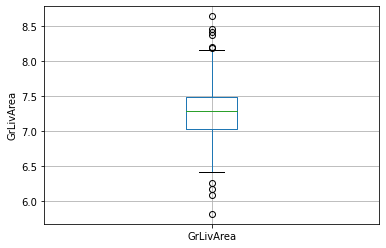

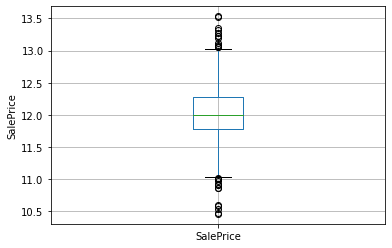

In [ ]:
for feature in cont_feature:
    df=data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.show()

# Categorical Variables

In [ ]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
data[categorical_features].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [ ]:
for feature in categorical_features:
    print('For feature {} , the number of categories are {}'.format(feature,len(data[feature].unique())))

For feature MSZoning , the number of categories are 5
For feature Street , the number of categories are 2
For feature LotShape , the number of categories are 4
For feature LandContour , the number of categories are 4
For feature Utilities , the number of categories are 2
For feature LotConfig , the number of categories are 5
For feature LandSlope , the number of categories are 3
For feature Neighborhood , the number of categories are 25
For feature Condition1 , the number of categories are 9
For feature Condition2 , the number of categories are 8
For feature BldgType , the number of categories are 5
For feature HouseStyle , the number of categories are 8
For feature RoofStyle , the number of categories are 6
For feature RoofMatl , the number of categories are 8
For feature Exterior1st , the number of categories are 15
For feature Exterior2nd , the number of categories are 16
For feature MasVnrType , the number of categories are 5
For feature ExterQual , the number of categories are 4
F

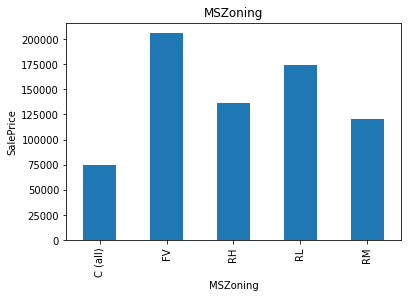

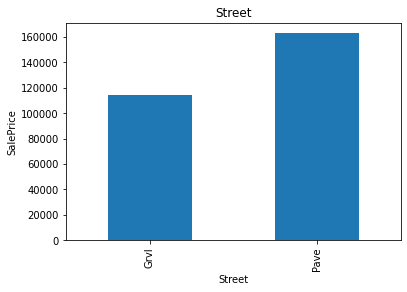

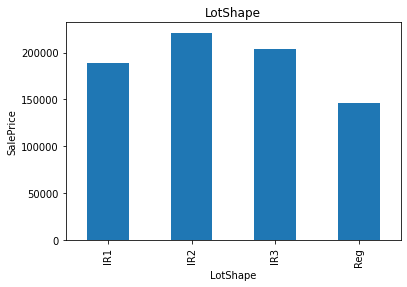

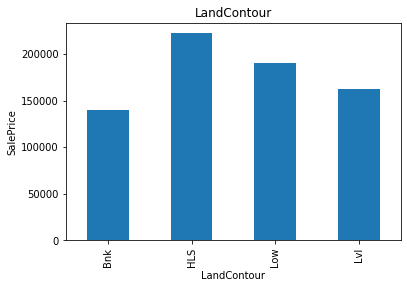

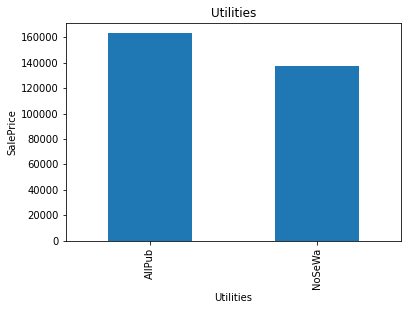

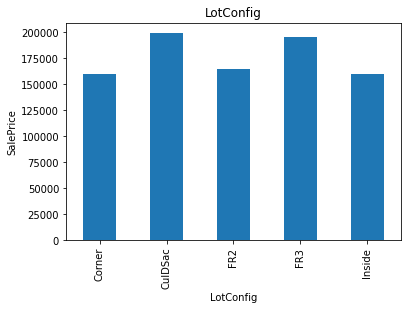

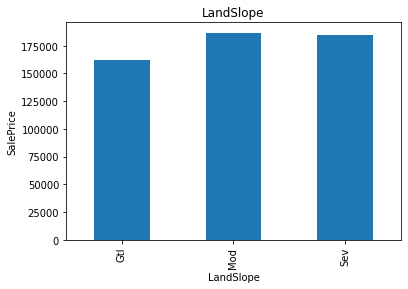

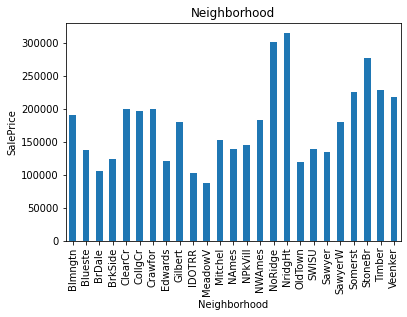

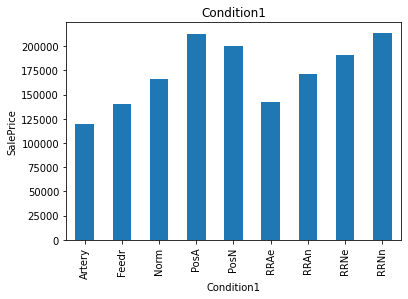

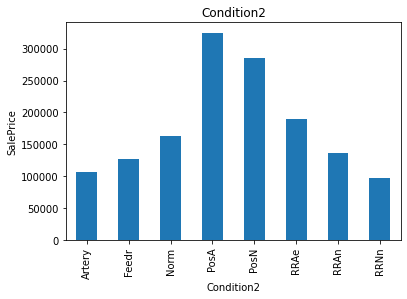

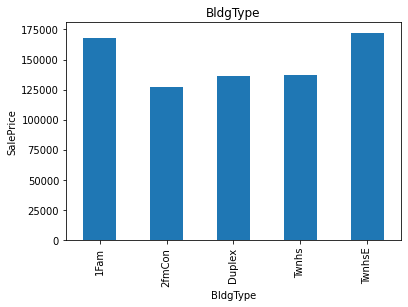

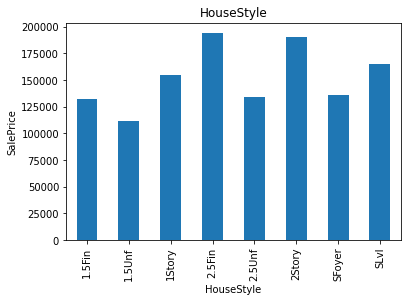

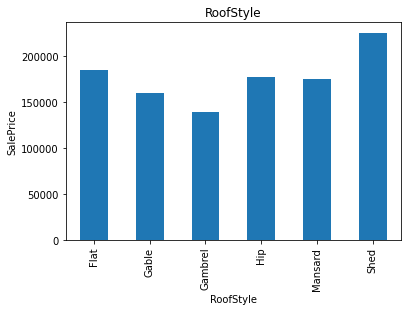

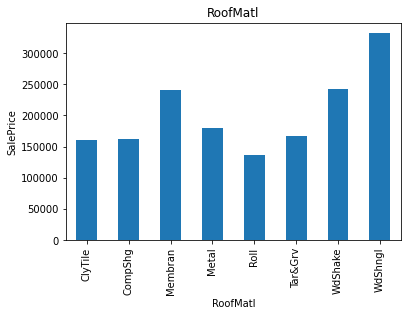

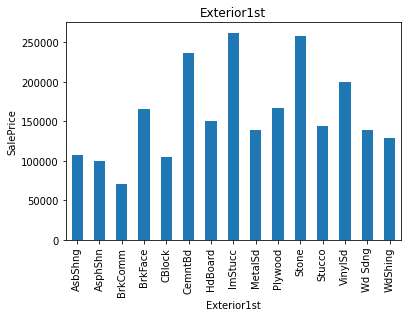

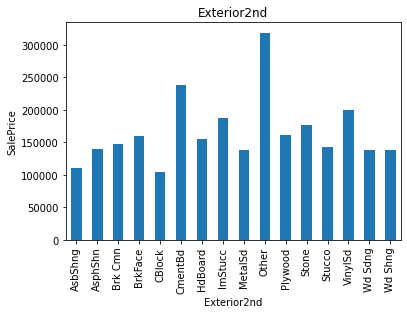

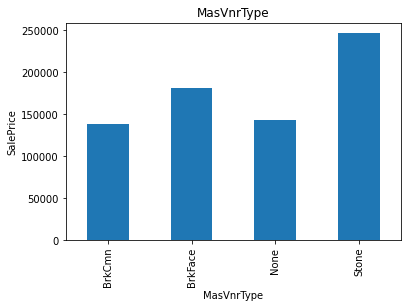

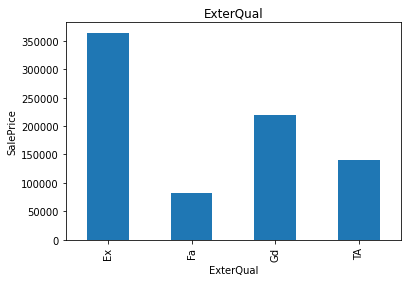

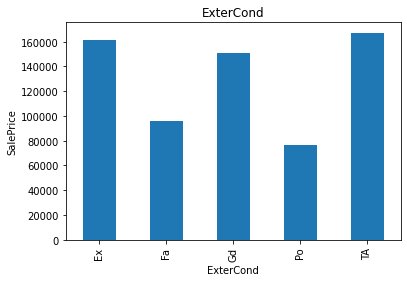

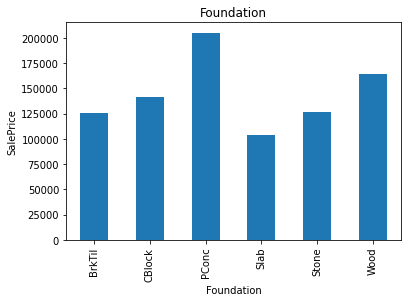

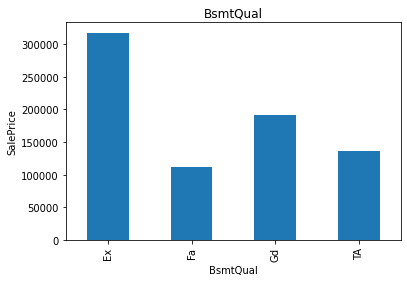

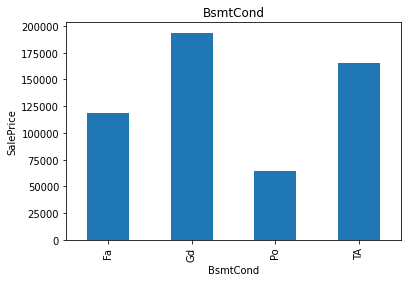

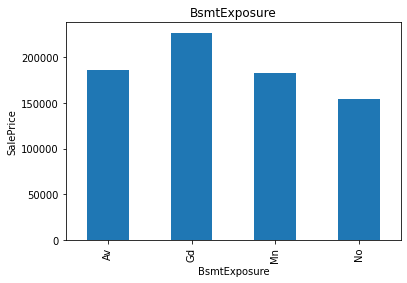

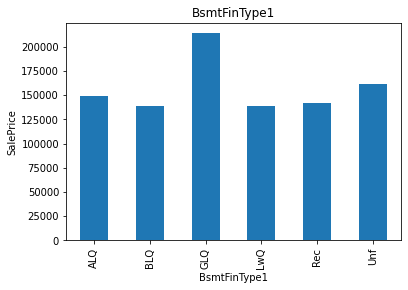

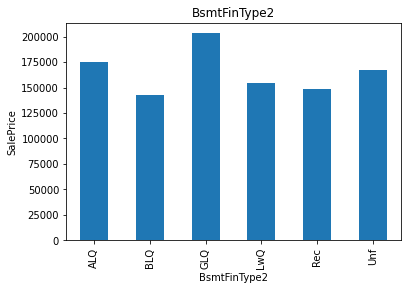

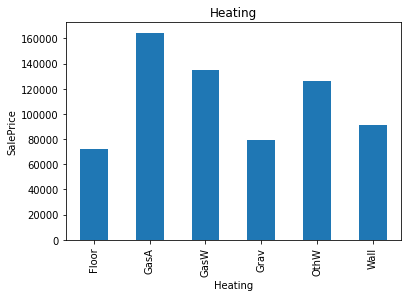

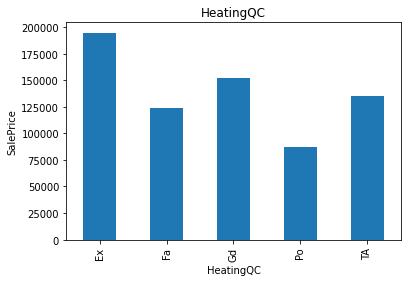

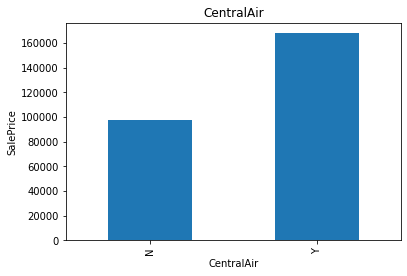

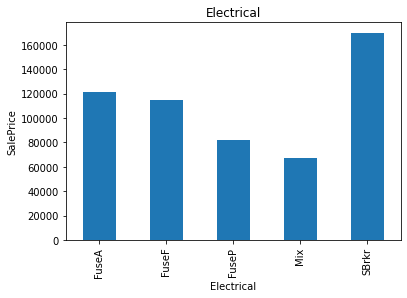

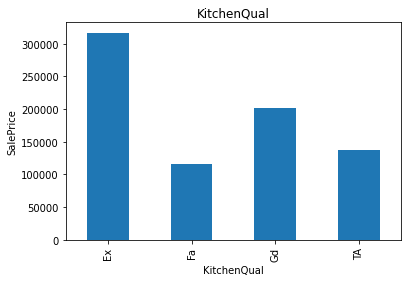

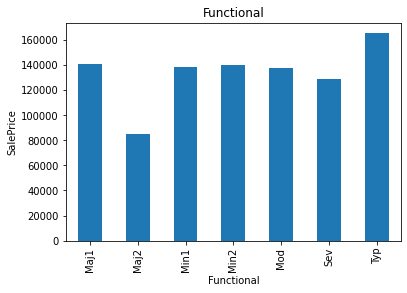

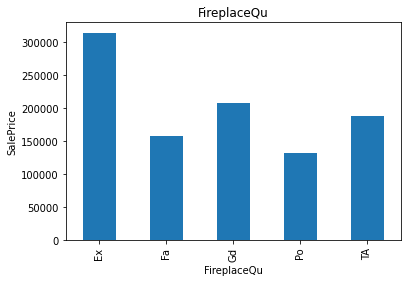

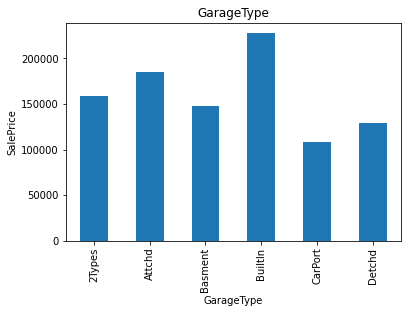

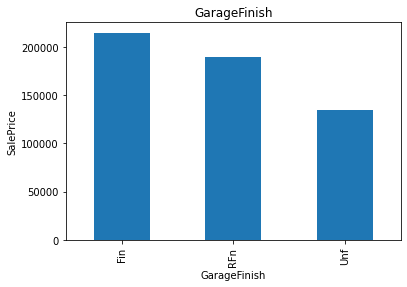

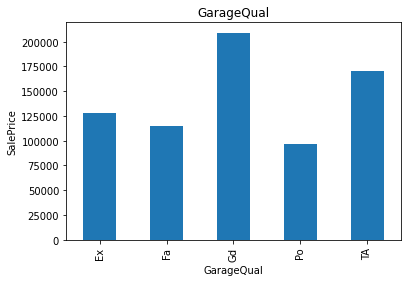

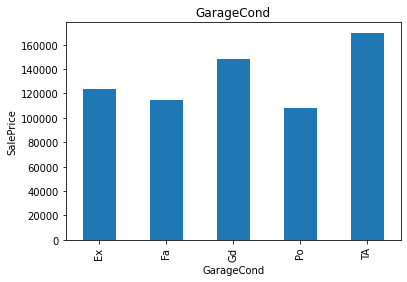

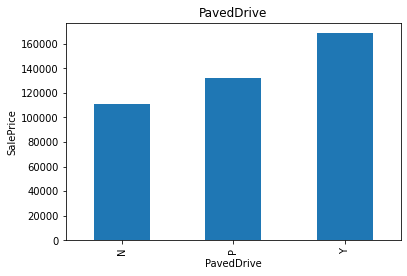

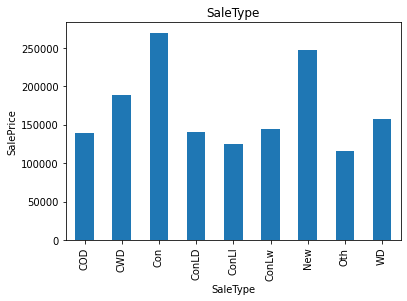

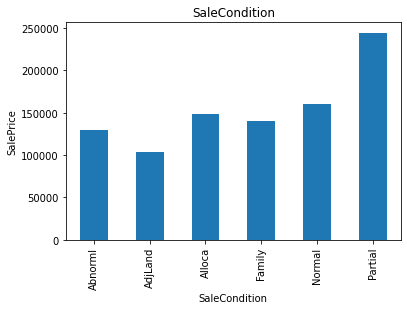

In [ ]:
for feature in categorical_features:
    data1=data.copy()
    data1.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

# Feature Engineering on dataset

## Handling missing values

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
test_df=pd.read_csv('/content/drive/MyDrive/Advance House Price/test.csv')

In [ ]:
test_df.head()
# test_df.drop(['Alley','PoolQC','MiscFeature','Fence','FireplaceQu'],axis=1,inplace=True)
test_df.drop(['Alley','PoolQC','MiscFeature','Fence'],axis=1,inplace=True)

In [ ]:
print(data.shape)
print(test_df.shape)

(1460, 77)
(1459, 76)


In [ ]:
data=pd.concat([data,test_df],axis=0)

In [ ]:
data.shape

(2919, 77)

In [ ]:
features_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes=='O' and feature not in ['SalePrice']]
# nan values in categorical features
for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(data[feature].isnull().mean(),4)))

MSZoning: 0.0014% missing values
Utilities: 0.0007% missing values
MasVnrType: 0.0082% missing values
BsmtQual: 0.0277% missing values
BsmtCond: 0.0281% missing values
BsmtExposure: 0.0281% missing values
BsmtFinType1: 0.0271% missing values
BsmtFinType2: 0.0274% missing values
Functional: 0.0007% missing values
FireplaceQu: 0.4865% missing values
GarageType: 0.0538% missing values
GarageFinish: 0.0545% missing values
GarageQual: 0.0545% missing values
GarageCond: 0.0545% missing values


In [ ]:
# giving new lable to missing values
def replace_cat_feature(data,features_nan):
    df=data.copy()
    df[features_nan]=df[features_nan].fillna('Missing')

    return df

data=replace_cat_feature(data,features_nan)

data[features_nan].isnull().sum()

###############################################################################################################
# for feature in features_nan:
#     data[feature].fillna(data[feature].mode()[0],inplace=True)

# data[features_nan].isnull().sum()





# data['MSZoning']=data['MSZoning'].fillna(data['MSZoning'].mode()[0])
# data['Utilities']=data['Utilities'].fillna(data['Utilities'].mode()[0])
# data['MasVnrType']=data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
# data['BsmtQual']=data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
# data['BsmtCond']=data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])
# data['BsmtExposure']=data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])
# data['BsmtFinType1']=data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])
# data['BsmtFinType2']=data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])
# data['Functional']=data['Functional'].fillna(data['Functional'].mode()[0])
# data['GarageType']=data['GarageType'].fillna(data['GarageType'].mode()[0])
# data['GarageFinish']=data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
# data['GarageQual']=data['GarageQual'].fillna(data['GarageQual'].mode()[0])
# data['GarageCond']=data['GarageCond'].fillna(data['GarageCond'].mode()[0])
# data['FireplaceQu']=data['FireplaceQu'].fillna(data['FireplaceQu'].mode()[0])

# data[features_nan].isnull().sum()


MSZoning        0
Utilities       0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [ ]:
data.head(-5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,2910,180,RM,21.0,1470,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,522.0,Unf,0.0,108.0,630.0,GasA,TA,Y,SBrkr,630,0,0,630,1.0,0.0,1,0,1,1,TA,3,Typ,0,Missing,Missing,NaN,Missing,0.0,0.0,Missing,Missing,Y,0,0,0,0,0,0,0,4,2006,WD,Normal,NaN
1450,2911,160,RM,21.0,1484,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,4,1972,1972,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,Missing,Attchd,1972.0,Unf,1.0,253.0,TA,Fa,Y,0,0,0,0,0,0,0,5,2006,WD,Normal,NaN
1451,2912,20,RL,80.0,13384,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1969,1979,Gable,CompShg,Plywood,Plywood,BrkFace,194.0,TA,TA,PConc,TA,TA,Av,Rec,119.0,BLQ,344.0,641.0,1104.0,GasA,Fa,Y,SBrkr,1360,0,0,1360,1.0,0.0,1,0,3,1,TA,8,Typ,1,TA,Attchd,1969.0,RFn,1.0,336.0,TA,TA,Y,160,0,0,0,0,0,0,5,2006,WD,Normal,NaN
1452,2913,160,RM,21.0,1533,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,408.0,Unf,0.0,138.0,546.0,GasA,TA,Y,SBrkr,546,54

In [ ]:
numerical_with_nan=[feature for feature in data.columns if data[feature].isnull().sum()>=1 and data[feature].dtypes!='O' and feature not in ['SalePrice']]

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(data[feature].isnull().mean(),4)))

LotFrontage: 0.1665% missing value
MasVnrArea: 0.0079% missing value
BsmtFinSF1: 0.0003% missing value
BsmtFinSF2: 0.0003% missing value
BsmtUnfSF: 0.0003% missing value
TotalBsmtSF: 0.0003% missing value
BsmtFullBath: 0.0007% missing value
BsmtHalfBath: 0.0007% missing value
GarageYrBlt: 0.0545% missing value
GarageCars: 0.0003% missing value
GarageArea: 0.0003% missing value


In [ ]:
# replacing nan values with median as the three features has lot of outliers
for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=data[feature].median()
    
    ## create a new feature to capture nan values
    data[feature+'nan']=np.where(data[feature].isnull(),1,0)
    data[feature].fillna(median_value,inplace=True)
    
data[numerical_with_nan].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

In [ ]:
data.head(-5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0,0,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0,0,0,0,0,0,0,0,0,0,0,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0,0,0,0,0,0,0,0,0,0,0,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0,0,0,0,0,0,0,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,2910,180,RM,21.0,1470,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,522.0,Unf,0.0,108.0,630.0,GasA,TA,Y,SBrkr,630,0,0,630,1.0,0.0,1,0,1,1,TA,3,Typ,0,Missing,Missing,1979.0,Missing,0.0,0.0,Missing,Missing,Y,0,0,0,0,0,0,0,4,2006,WD,Normal,NaN,0,0,0,0,0,0,0,0,1,0,0
1450,2911,160,RM,21.0,1484,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,4,1972,1972,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,Missing,Attchd,1972.0,Unf,1.0,253.0,TA,Fa,Y,0,0,0,0,0,0,0,5,2006,WD,Normal,NaN,0,0,0,0,0,0,0,0,0,0,0
1451,2912,20,RL,80.0,13384,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1969,1979,Gable,CompShg,Plywood,Plywood,BrkFace,194.0,TA,TA,PConc,TA,TA,Av,Rec,119.0,BLQ,344.0,6

## Label Encoding for features with more number of categories

In [ ]:
categorical_features=[feature for feature in data.columns if data[feature].dtype=='O']

In [ ]:
label=[]
for feature in categorical_features:
    if data[feature].nunique()>=5:
        print(feature, data[feature].nunique())
        label.append(feature)
len(label  )

MSZoning 6
LotConfig 5
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 5
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
Heating 6
HeatingQC 5
Electrical 5
Functional 8
FireplaceQu 6
GarageType 7
GarageQual 6
GarageCond 6
SaleType 9
SaleCondition 6


29

In [ ]:
data['Neighborhood'].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

In [ ]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()

# # le.fit(label)
# # le.classes_
# # le.transform(label)
# # le.transform(label)
# # le.classes_
# # le.fit(data[label])
# # data[label]=le.transform(data[label])
# for i in label:
#     a=np.array(data[i])
#     le.fit(a)
#     data[label]=pd.DataFrame(b)
    
    
# for feature in label:
#     df_freq_map=data[feature].value_counts()
#     data[feature]=data[feature].map(df_freq_map)
#     data[feature]=data[feature]/len(data[feature])

In [ ]:
# data=data.replace(clean)
# data.head()

## date time variables

In [ ]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
  data[feature]=data['YrSold']-data[feature]

In [ ]:
data[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0



## Numerical features

In [ ]:
## taking the skewed features
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
# num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea','Neighborhood','Condition1','Condition2','Exterior1st','Exterior2nd']

for feature in num_features:
    data[feature]=np.log(data[feature])

In [ ]:
data[categorical_features].nunique()

MSZoning          6
Street            2
LotShape          4
LandContour       4
Utilities         3
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        5
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        8
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [ ]:
data['TotalSF'] = (data['TotalBsmtSF'] 
                       + data['1stFlrSF'] 
                       + data['2ndFlrSF'])

data['YrBltAndRemod'] = data['YearBuilt'] + data['YearRemodAdd']
data['Total_sqr_footage'] = (data['BsmtFinSF1'] 
                                 + data['BsmtFinSF2'] 
                                 + data['1stFlrSF'] 
                                 + data['2ndFlrSF']
                                )
                                 

data['Total_Bathrooms'] = (data['FullBath'] 
                               + (0.5 * data['HalfBath']) 
                               + data['BsmtFullBath'] 
                               + (0.5 * data['BsmtHalfBath'])
                              )
                               

data['Total_porch_sf'] = (data['OpenPorchSF'] 
                              + data['3SsnPorch'] 
                              + data['EnclosedPorch'] 
                              + data['ScreenPorch'] 
                              + data['WoodDeckSF']
                             )

In [ ]:
data['haspool'] = data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
data['has2ndfloor'] = data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
data['hasgarage'] = data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
data['hasbsmt'] = data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
data['hasfireplace'] = data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
high_features=[feature for feature in categorical_features if data[feature].nunique()>20]
high_features

['Neighborhood']

In [ ]:
low_features=[feature for feature in categorical_features if feature not in high_features] 
low_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

## Target guided mean encoding

In [ ]:
# for feature in high_features:
#   cat_labels=data.groupby([feature])['SalePrice'].mean().sort_values().index
#   cat_lables2={k:i for i,k in enumerate(cat_labels,0)}
#   data[feature]=data[feature].map(cat_lables2)

## Count based label encoding

In [ ]:
# for feature in low_features:
#   dic=data[feature].value_counts().to_dict()
#   list1=np.arange(len(dic.values()),0,-1)
#   dic2=dict(zip(list(dic.keys()),list1))
#   data[feature]=data[feature].replace(dic2)

## Label encoding

In [ ]:
# labelencoder=LabelEncoder()
# for var in count:
#   data[var]=labelencoder.fit_transform(data[var])

## One hot Encoding

In [ ]:
cat_features=[feature for feature in data.columns if data[feature].dtype=='O']
cat_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

### rare categorical features

#### remove categorical variables that are present less than 1% of the observations

In [ ]:
for feature in cat_features:
    temp=data.groupby(feature)['SalePrice'].count()/len(data)
    temp_df=temp[temp>0.001].index
    data[feature]=np.where(data[feature].isin(temp_df),data[feature],'Rare_var')
# if the feature has less than 0.01%, create new feature

In [ ]:
# for feature in categorical_features:
#     labels_ordered=data.groupby([feature])['SalePrice'].mean().sort_values().index
#     labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
#     data[feature]=data[feature].map(labels_ordered)
def category_onehot_multcols(multcolumns):
    df_final=data
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(data[fields],drop_first=True)
        
        data.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([data,df_final],axis=1)
        
    return df_final

In [ ]:
data=category_onehot_multcols(cat_features)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [ ]:
data =data.loc[:,~data.columns.duplicated()]

In [ ]:
data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan,TotalSF,YrBltAndRemod,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace,FV,RH,RL,RM,Rare_var,Pave,IR2,IR3,Reg,HLS,Low,Lvl,CulDSac,FR2,FR3,Inside,Mod,Sev,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Tar&Grv,WdShake,WdShngl,BrkFace,CemntBd,HdBoard,MetalSd,Plywood,Stucco,VinylSd,Wd Sdng,WdShing,AsphShn,Brk Cmn,CmentBd,ImStucc,Stone,Wd Shng,Missing,None,Fa,Gd,TA,CBlock,PConc,Slab,Wood,Mn,No,BLQ,GLQ,LwQ,Rec,Unf,GasW,Grav,Wall,Y,FuseF,FuseP,SBrkr,Maj2,Min1,Min2,Typ,Po,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P,CWD,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,1,60,4.174387,9.041922,7,5,5,5,196.0,706.0,0.0,150.0,856.0,6.752270,854,0,7.444249,1.0,0.0,2,1,3,1,8,0,5.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,12.247694,0,0,0,0,0,0,0,0,0,0,0,1716.752270,10,1566.752270,3.5,61,0,1,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,20,4.382027,9.169518,6,8,31,31,0.0,978.0,0.0,284.0,1262.0,7.140453,0,0,7.140453,0.0,1.0,2,0,3,1,6,1,31.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,12.109011,0,0,0,0,0,0,0,0,0,0,0,1269.140453,62,985.140453,2.5,298,0,0,1,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,60,4.219508,9.328123,7,5,7,6,162.0,486.0,0.0,434.0,920.0,6.824374,866,0,7.487734,1.0,0.0,2,1,3,1,6,1,7.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,12.317167,0,0,0,0,0,0,0,0,0,0,0,1792.824374,13,1358.824374,3.5,42,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,70,4.094345,9.164296,7,5,91,36,0.0,216.0,0.0,540.0,756.0,6.867974,756,0,7.448334,1.0,0.0,1,0,3,1,7,1,8.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,11.849398,0,0,0,0,0,0,0,0,0,0,0,1518.867974,127,978.867974,2.0,307,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,60,4.430817,9.565214,8,5,8,8,350.0,655.0,0.0,490.0,1145.0,7.043160,1053,0,7.695303,1.0,0.0,2,1,4,1,9,1,8.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,12.429216,0,0,0,0,0,0,0,0,0,0,0,2205.043160,16,1715.043160,3.5,276,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

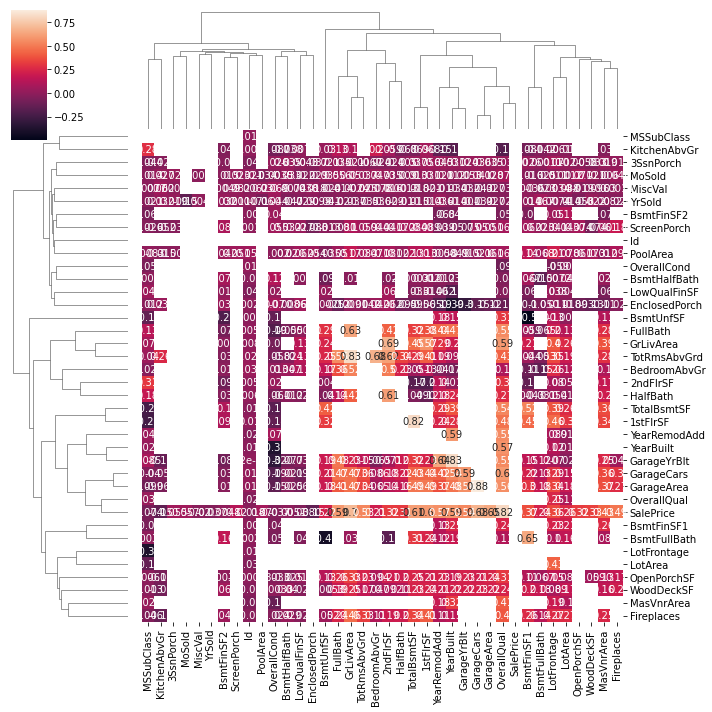

In [ ]:
sns.clustermap(df.corr(), annot = True, mask = np.triu(df.corr()))

## feature scaling

In [ ]:
feature_scale=[feature for feature in data.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler=StandardScaler()
scaler.fit(data[feature_scale])

StandardScaler()

In [ ]:
scaler.transform(data[feature_scale])

array([[ 0.06733141, -0.0370133 , -0.1036783 , ..., -0.12653513,
         0.46393674, -0.30269297],
       [-0.87361603,  0.59819041,  0.14657094, ..., -0.12653513,
         0.46393674, -0.30269297],
       [ 0.06733141,  0.10101769,  0.45763543, ..., -0.12653513,
         0.46393674, -0.30269297],
       ...,
       [-0.87361603,  2.7186441 ,  1.58606973, ..., -0.12653513,
        -2.15546626, -0.30269297],
       [ 0.65542357, -0.18156781,  0.31127155, ..., -0.12653513,
         0.46393674, -0.30269297],
       [ 0.06733141,  0.35969295,  0.15207922, ..., -0.12653513,
         0.46393674, -0.30269297]])

In [ ]:
final_df = pd.concat([data[[ 'Id','SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data[feature_scale]), columns=feature_scale)],axis=1)

In [ ]:
# final_df.drop(['Id'],axis=1,inplace=True)
final_df.head(-2)

,Id,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan,TotalSF,YrBltAndRemod,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace,FV,RH,RL,RM,Rare_var,Pave,IR2,IR3,Reg,HLS,Low,Lvl,CulDSac,FR2,FR3,Inside,Mod,Sev,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Tar&Grv,WdShake,WdShngl,BrkFace,CemntBd,HdBoard,MetalSd,Plywood,Stucco,VinylSd,Wd Sdng,WdShing,AsphShn,Brk Cmn,CmentBd,ImStucc,Stone,Wd Shng,Missing,None,Fa,Gd,TA,CBlock,PConc,Slab,Wood,Mn,No,BLQ,GLQ,LwQ,Rec,Unf,GasW,Grav,Wall,Y,FuseF,FuseP,SBrkr,Maj2,Min1,Min2,Typ,Po,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P,CWD,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,1,12.247694,0.067331,-0.037013,-0.103678,0.646183,-0.507284,-1.037881,-0.887009,0.529034,0.580959,-0.293025,-0.934782,-0.444278,-0.777202,1.207379,-0.101197,0.564688,1.087334,-0.249719,0.781366,1.232599,0.169927,-0.207698,0.986849,-0.924311,-0.989010,0.306418,0.348888,-0.740760,0.200006,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-1.552184,0.157646,-0.446938,-0.089118,-0.018512,-0.018512,-0.018512,-0.018512,-0.026185,-0.026185,-0.240018,-0.018512,-0.018512,0.586649,-1.082632,1.267399,1.584766,-0.762276,-0.066884,1.154701,0.238417,0.165696,-1.027440,-0.223607,-0.094801,0.537347,-0.432513,-0.037043,0.064249,-0.1635,-0.07424,0.755115,-0.207057,-0.144867,0.33656,-0.253305,-0.173185,-0.069421,0.607038,-0.211515,-0.07424,-0.101903,-0.196011,-0.123711,3.151600,-0.191250,-0.26682,-0.244771,-0.181408,-0.113306,-0.201598,-0.422987,-0.089118,-0.216765,-0.157892,-0.245556,-0.298629,-0.129302,-0.233564,-0.211515,-0.257869,-0.133351,-0.159028,-0.091050,-0.243984,0.403094,-0.08306,-0.116369,-0.098414,-0.132014,-0.055613,-0.147313,-0.196952,-0.184408,-0.290386,-0.080943,-1.007911,-0.052423,-0.09105,1.532148,-0.171075,-0.214153,0.513455,-0.087144,-0.482375,-0.061503,-0.089118,-0.055613,-0.049029,-0.175272,-0.212398,-0.422424,-0.426919,-0.286204,-0.122276,1.359340,-0.404816,-0.139857,-0.037043,-0.087144,-0.212398,-0.07187,-0.045384,-0.168941,-0.09105,-1.216566,-0.110163,1.407698,-1.266462,-0.856372,1.109798,-0.130664,-0.041423,-0.298629,0.730129,-0.318605,1.561462,-0.236,-0.330854,-0.641489,-0.096623,-0.055613,-0.045384,0.26829,-0.132014,-0.052423,0.304712,-0.055613,-0.150914,-0.156748,0.272666,-0.126535,0.833150,-0.111745,-0.260878,-0.071870,-0.603340,1.612222,-0.147313,-0.064249,-0.094801,-0.055613,-0.052423,-0.298629,-0.049029,0.395018,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,2,12.109011,-0.873616,0.598190,0.146571,-0.063185,2.188279,-0.180672,0.357696,-0.567016,1.178162,-0.293025,-0.629818,0.477158,0.424972,-0.785025,-0.101197,-0.370255,-0.818929,3.822508,0.781366,-0.756321,0.169927,-0.207698,-0.287758,0.623632,0.054968,0.306418,-0.059804,1.614879,-0.702843,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-0.446925,-0.602962,-0.446938,-0.089118,-0.018512,-0.018512,-0.018512,-0.018512,-0.026185,-0.026185,-0.240018,-0.018512,-0.018512,-0.230096,0.043120,0.260800,0.348216,0.719030,-0.066884,-0.866025,0.238417,0.165696,0.973292,-0.223607,-0.094801,0.537347,-0.432513,-0.037043,0.064249,-0.1635,-0.07424,0.755115,-0.207057,-0.144867,0.33656,-0.253305,5.774182,-0.069421,-1.647343,-0.211515,-0.07424

In [ ]:
# final_df.to_csv('final_df2.csv',index=False)

In [ ]:
final_df.head(1)

,Id,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan,TotalSF,YrBltAndRemod,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace,FV,RH,RL,RM,Rare_var,Pave,IR2,IR3,Reg,HLS,Low,Lvl,CulDSac,FR2,FR3,Inside,Mod,Sev,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Tar&Grv,WdShake,WdShngl,BrkFace,CemntBd,HdBoard,MetalSd,Plywood,Stucco,VinylSd,Wd Sdng,WdShing,AsphShn,Brk Cmn,CmentBd,ImStucc,Stone,Wd Shng,Missing,None,Fa,Gd,TA,CBlock,PConc,Slab,Wood,Mn,No,BLQ,GLQ,LwQ,Rec,Unf,GasW,Grav,Wall,Y,FuseF,FuseP,SBrkr,Maj2,Min1,Min2,Typ,Po,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P,CWD,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,1,12.247694,0.067331,-0.037013,-0.103678,0.646183,-0.507284,-1.037881,-0.887009,0.529034,0.580959,-0.293025,-0.934782,-0.444278,-0.777202,1.207379,-0.101197,0.564688,1.087334,-0.249719,0.781366,1.232599,0.169927,-0.207698,0.986849,-0.924311,-0.98901,0.306418,0.348888,-0.74076,0.200006,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-1.552184,0.157646,-0.446938,-0.089118,-0.018512,-0.018512,-0.018512,-0.018512,-0.026185,-0.026185,-0.240018,-0.018512,-0.018512,0.586649,-1.082632,1.267399,1.584766,-0.762276,-0.066884,1.154701,0.238417,0.165696,-1.02744,-0.223607,-0.094801,0.537347,-0.432513,-0.037043,0.064249,-0.1635,-0.07424,0.755115,-0.207057,-0.144867,0.33656,-0.253305,-0.173185,-0.069421,0.607038,-0.211515,-0.07424,-0.101903,-0.196011,-0.123711,3.1516,-0.19125,-0.26682,-0.244771,-0.181408,-0.113306,-0.201598,-0.422987,-0.089118,-0.216765,-0.157892,-0.245556,-0.298629,-0.129302,-0.233564,-0.211515,-0.257869,-0.133351,-0.159028,-0.09105,-0.243984,0.403094,-0.08306,-0.116369,-0.098414,-0.132014,-0.055613,-0.147313,-0.196952,-0.184408,-0.290386,-0.080943,-1.007911,-0.052423,-0.09105,1.532148,-0.171075,-0.214153,0.513455,-0.087144,-0.482375,-0.061503,-0.089118,-0.055613,-0.049029,-0.175272,-0.212398,-0.422424,-0.426919,-0.286204,-0.122276,1.35934,-0.404816,-0.139857,-0.037043,-0.087144,-0.212398,-0.07187,-0.045384,-0.168941,-0.09105,-1.216566,-0.110163,1.407698,-1.266462,-0.856372,1.109798,-0.130664,-0.041423,-0.298629,0.730129,-0.318605,1.561462,-0.236,-0.330854,-0.641489,-0.096623,-0.055613,-0.045384,0.26829,-0.132014,-0.052423,0.304712,-0.055613,-0.150914,-0.156748,0.272666,-0.126535,0.83315,-0.111745,-0.260878,-0.07187,-0.60334,1.612222,-0.147313,-0.064249,-0.094801,-0.055613,-0.052423,-0.298629,-0.049029,0.395018,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


In [ ]:
# final_df['SalePrice']=np.exp(final_df['SalePrice'])
final_df.drop(['Id'],axis=1,inplace=True)

In [ ]:
# df_Train=final_df.iloc[0:1248,:]
# df_valid=final_df.iloc[1248:1394,:]
# df_Test=final_df.iloc[1394:,:]

#####################################################

df_Train=final_df.iloc[0:train_len,:]
df_Test=final_df.iloc[train_len:,:]

In [ ]:
df_Train.shape

(1460, 186)

In [ ]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']
    
X_train,x_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size = 0.1,random_state=1)

# Prediction and selecting the Algorithm

In [ ]:
reg_ols= sm.OLS(y_train, X_train)
results = reg_ols.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
=======================================================================
Model:                OLS               Adj. R-squared:      0.919     
Dependent Variable:   SalePrice         AIC:                 -1858.7816
Date:                 2023-02-09 06:36  BIC:                 -983.2211 
No. Observations:     1314              Log-Likelihood:      1098.4    
Df Model:             168               F-statistic:         90.10     
Df Residuals:         1145              Prob (F-statistic):  0.00      
R-squared:            0.930             Scale:               0.012626  
-----------------------------------------------------------------------
                   Coef.   Std.Err.     t      P>|t|   [0.025   0.975] 
-----------------------------------------------------------------------
MSSubClass         -0.0051   0.0173    -0.2964 0.7670  -0.0391   0.0289
LotFrontage         0.0005   0.0057     0.0841 0.9330  -0.0108   0.0117
LotArea             0.0355   0.0069     5.1100 0.0000   0.0219   0.0491
OverallQual         0.0679   0.0071     9.5767 0.0000   0.0540   0.0818
OverallCond         0.0451   0.0048     9.4598 0.0000   0.0357   0.0545
YearBuilt          -0.0401   0.0085    -4.7161 0.0000  -0.0568  -0.0234
YearRemodAdd       -0.0040   0.0056    -0.7151 0.4747  -0.0151   0.0070
MasVnrArea         -0.0052   0.0052    -0.9944 0.3202  -0.0155   0.0051
BsmtFinSF1          0.0757   0.0044    17.2687 0.0000   0.0671   0.0843
BsmtFinSF2          0.0265   0.0038     6.9585 0.0000   0.0190   0.0340
BsmtUnfSF           0.1254   0.0035    35.7453 0.0000   0.1185   0.1323
TotalBsmtSF        -0.0854   0.0052   -16.5040 0.0000  -0.0956  -0.0753
1stFlrSF            0.0202   0.0179     1.1310 0.2583  -0.0149   0.0554
2ndFlrSF            0.0192   0.0090     2.1367 0.0328   0.0016   0.0369
LowQualFinSF        0.0010   0.0058     0.1793 0.8577  -0.0104   0.0125
GrLivArea           0.1319   0.0214     6.1686 0.0000   0.0899   0.1739
BsmtFullBath        0.0157   0.0043     3.6987 0.0002   0.0074   0.0241
BsmtHalfBath        0.0019   0.0038     0.4899 0.6243  -0.0056   0.0093
FullBath            0.0012   0.0047     0.2565 0.7976  -0.0079   0.0103
HalfBath            0.0040   0.0048     0.8323 0.4054  -0.0055   0.0135
BedroomAbvGr       -0.0050   0.0059    -0.8483 0.3964  -0.0165   0.0065
KitchenAbvGr       -0.0117   0.0066    -1.7700 0.0770  -0.0247   0.0013
TotRmsAbvGrd        0.0055   0.0075     0.7304 0.4653  -0.0092   0.0201
Fireplaces          0.0126   0.0085     1.4782 0.1396  -0.0041   0.0294
GarageYrBlt        -0.0005   0.0075    -0.0607 0.9516  -0.0152   0.0143
GarageCars          0.0373   0.0091     4.0983 0.0000   0.0195   0.0552
GarageArea          0.0028   0.0089     0.3101 0.7565  -0.0147   0.0202
WoodDeckSF          0.0018   0.0027     0.6649 0.5063  -0.0035   0.0072
OpenPorchSF        -0.0026   0.0035    -0.7214 0.4708  -0.0095   0.0044
EnclosedPorch       0.0084   0.0036     2.3041 0.0214   0.0012   0.0155
3SsnPorch           0.0029   0.0028     1.0442 0.2966  -0.0025   0.0083
ScreenPorch         0.0125   0.0033     3.7909 0.0002   0.0060   0.0189
PoolArea            0.1539   0.0246     6.2465 0.0000   0.1055   0.2022
MiscVal            -0.0009   0.0036    -0.2506 0.8022  -0.0081   0.0062
MoSold             -0.0041   0.0034    -1.1940 0.2327  -0.0108   0.0026
YrSold              0.0000   0.0035     0.0116 0.9907  -0.0068   0.0068
LotFrontagenan     -0.0001   0.0037    -0.0274 0.9782  -0.0073   0.0071
MasVnrAreanan       4.7333   0.0023  2014.5956 0.0000   4.7287   4.7379
BsmtFinSF1nan     -46.2223   0.0125 -3711.5291 0.0000 -46.2467 -46.1978
BsmtFinSF2nan     -46.2223   0.0125 -3711.5291 0.0000 -46.2467 -46.1978
BsmtUnfSFnan      -46.2223   0.0125 -3711.5291 0.0000 -46.2467 -46.1978
TotalBsmtSFnan    -46.2223   0.0125 -3711.5291 0.0000 -46.2467 -46.1978
BsmtFullBathnan   -65.3794   0.0176 -3711.5291 0.0000 -65.4139 -65.3448
BsmtHalfBat

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

In [ ]:
lin_reg.fit(X_train,y_train)
y_v_lg=lin_reg.predict(x_valid)
y_t_lg=lin_reg.predict(df_Test)

NameError: ignored

In [ ]:
y_t_lg

In [ ]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
rmse(y_v_lg,y_valid)

0.12379541035232357

In [ ]:
for i in range(len(y_t_lg)):
  if y_t_lg[i]<=0:
    y_t_lg[i]=1
  elif y_t_lg[i]>20:
    y_t_lg[i]=20

## Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=8,random_state=42)

In [ ]:
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, random_state=42)

In [ ]:
y_pred_valid1=tree_reg.predict(x_valid)

In [ ]:
y_test1=tree_reg.predict(df_Test)

In [ ]:
y_test1

array([11.72590552, 11.7728446 , 12.16683607, ..., 12.01009554,
       11.72590552, 12.58504432])

In [ ]:
rmse(y_pred_valid1,y_valid)

0.21198509576933058

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=42)
min_val_error = float("inf")
error_going_up = 0
for max_depth in range(1, 100):
    tree_reg.max_depth = max_depth
    tree_reg.fit(X_train, y_train)
    y_pred = tree_reg.predict(x_valid)
    val_error = rmse(y_valid, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 10:
            break  # early stopping

In [ ]:
print(tree_reg.max_depth)

18


## Extra Trees regressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(max_depth=8, min_samples_leaf=35, min_samples_split=25,
                    n_estimators=60, n_jobs=4)
etr.fit(X_train,y_train)

ExtraTreesRegressor(max_depth=8, min_samples_leaf=35, min_samples_split=25,
                    n_estimators=60, n_jobs=4)

In [ ]:
y_v_etr=etr.predict(x_valid)
y_t_etr=etr.predict(df_Test)
y_t_etr

array([11.68444343, 11.85479959, 12.05869514, ..., 11.9491927 ,
       11.71306899, 12.3050527 ])

In [ ]:
rmse(y_v_etr,y_valid)

0.17809819392108572

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

### Hyper parameter Tuning

In [ ]:
n_estimators = [30,35, 40,45, 50,55, 60,65, 70,75]
max_depth = [1,2, 3, 4, 5, 6,7,8,9,10]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV 
random_cv = RandomizedSearchCV(estimator=etr,
            param_distributions=hyperparameter_grid,
            cv=10, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv.fit(X_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=10,
                   estimator=ExtraTreesRegressor(max_depth=10,
                                                 min_samples_leaf=35,
                                                 min_samples_split=25,
                                                 n_estimators=55, n_jobs=4),
                   n_iter=50, n_jobs=4,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [30, 35, 40, 45, 50, 55,
                                                         60, 65, 70, 75]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [ ]:
random_cv.best_estimator_

ExtraTreesRegressor(max_depth=8, min_samples_leaf=35, min_samples_split=25,
                    n_estimators=60, n_jobs=4)

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=4,learning_rate=0.2, n_estimators=60, random_state=42)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=4, n_estimators=60,
                          random_state=42)

In [ ]:
y_pred_test2=gbrt.predict(df_Test)
    
y_pred_valid2=gbrt.predict(x_valid)
rmse(y_pred_valid2,y_valid)

0.13364634094845437

In [ ]:
y_pred_test2

array([11.75287186, 11.93308651, 12.11735825, ..., 12.1068847 ,
       11.73786516, 12.42587184])

### Hyper parameter Tuning

In [ ]:
n_estimators = [30,35, 40,45, 50,55, 60,65, 70,75]
max_depth = [2, 3, 4, 5, 6,7,8,9,10]
learning_rate=[0.1,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV 
random_cv = RandomizedSearchCV(estimator=gbrt,
            param_distributions=hyperparameter_grid,
            cv=10, n_iter=50,
            scoring = 'neg_root_mean_squared_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv.fit(X_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=10,
                   estimator=GradientBoostingRegressor(learning_rate=0.17,
                                                       max_depth=4,
                                                       n_estimators=70,
                                                       random_state=42),
                   n_iter=50, n_jobs=4,
                   param_distributions={'learning_rate': [0.1, 0.15, 0.16, 0.17,
                                                          0.18, 0.19, 0.2, 0.21,
                                                          0.22, 0.23],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [30, 35, 40, 45, 50, 55,
                                                         60, 65, 70, 75]},
                   random_state=42, return_train_score=True,
                   scoring='neg_root_mean_squared_error'

In [ ]:
random_cv.best_estimator_

GradientBoostingRegressor(learning_rate=0.2, n_estimators=60, random_state=42)

In [ ]:
y=np.log(y_pred_valid2)
rmse(y,np.log(y_valid))

0.011461686781615148

In [ ]:
# gbrt = GradientBoostingRegressor(max_depth=4, learning_rate=0.17, random_state=42)

# min_val_error = float("inf")
# error_going_up = 0
# for n_estimators in range(30, 90):
#     gbrt.n_estimators = n_estimators
#     gbrt.fit(X_train, y_train)
#     y_pred = gbrt.predict(x_valid)
#     val_error = rmse(y_valid, y_pred)
#     if val_error < min_val_error:
#         min_val_error = val_error
#         error_going_up = 0
#     else:
#         error_going_up += 1
#         if error_going_up == 5:
#             break  # early stopping

In [ ]:
# print(gbrt.n_estimators)

59


## XGBoost

In [ ]:
import xgboost
regressor=xgboost.XGBRegressor(base_score=0.75, gpu_id=1, interaction_constraints='',
             learning_rate=0.15, max_depth=2, min_child_weight=3,
             monotone_constraints='(1,-1)', n_estimators=500, n_jobs=4,
             num_parallel_tree=1, tree_method='exact', validate_parameters=1,
             verbosity=3)
regressor.fit(X_train,y_train)

[06:11:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:11:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[06:11:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[06:11:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[06:11:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[06:11:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[06:11:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[06:11:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pru

XGBRegressor(base_score=0.75, gpu_id=1, interaction_constraints='',
             learning_rate=0.15, max_depth=2, min_child_weight=3,
             monotone_constraints='(1,-1)', n_estimators=500, n_jobs=4,
             num_parallel_tree=1, tree_method='exact', validate_parameters=1,
             verbosity=3)

In [ ]:
y_t_xg=regressor.predict(df_Test)
    
y_p_xg=regressor.predict(x_valid)
rmse(y_p_xg,y_valid)

0.1335775827512402

In [ ]:
y_t_xg

array([11.731247, 11.975428, 12.142873, ..., 11.988235, 11.703918,
       12.324315], dtype=float32)

### Hyper parameter Tuning

In [ ]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [ ]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=10, n_iter=50,
            scoring = 'neg_root_mean_squared_error',n_jobs = 5,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv.fit(X_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[06:09:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:09:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[06:09:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[06:09:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[06:09:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[06:09:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[06:09:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[06:09:27] INFO: /workspace/src/tree/updat

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=0.75, gpu_id=1,
                                          interaction_constraints='',
                                          learning_rate=0.15, max_depth=2,
                                          min_child_weight=3,
                                          monotone_constraints='(1,-1)',
                                          n_estimators=500, n_jobs=4,
                                          num_parallel_tree=1,
                                          tree_method='exact',
                                          validate_parameters=1, verbosity=3),
                   n_iter=50, n_jobs=5,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
      

In [ ]:
random_cv.best_estimator_

XGBRegressor(base_score=0.75, gpu_id=1, interaction_constraints='',
             learning_rate=0.15, max_depth=2, min_child_weight=3,
             monotone_constraints='(1,-1)', n_estimators=500, n_jobs=4,
             num_parallel_tree=1, tree_method='exact', validate_parameters=1,
             verbosity=3)

## KNNs

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn=KNeighborsRegressor(n_neighbors=8)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=8)

In [ ]:
k_opt=0
error=0
for i in range(2,40):
  knn=KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_k=knn.predict(x_valid)
  if rmse(y_k,y_valid)>error:
    error=rmse(y_k,y_valid)
    k_opt=i
    print(error,i)

0.25275914486484685 2


In [ ]:
# y_p_knn=knn.predict(X_train)
y_v_knn=knn.predict(x_valid)
y_t_knn=knn.predict(df_Test)

In [ ]:
rmse(y_v_knn,y_valid)

0.21410542262200938

## SVM

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr=SVR( kernel='rbf', degree=2, gamma='auto', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)


In [ ]:
svr.fit(X_train,y_train)

SVR(degree=2, gamma='auto')

In [ ]:
# y_p_svr=svr.predict(X_train)
y_v_svr=svr.predict(x_valid)
y_t_svr=svr.predict(df_Test)

In [ ]:
rmse(y_valid,y_v_svr)

0.22468870863725365

## ANNs

In [ ]:
!pip install tensorflow
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [ ]:
sgd=tensorflow.keras.optimizers.SGD(learning_rate=0.01, decay=1e-6,momentum=0.1, nesterov=True)
rms = tensorflow.keras.optimizers.RMSprop()
nadam=tensorflow.keras.optimizers.Nadam(
    learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam"
)

In [ ]:
lrelu = lambda x: tensorflow.keras.activations.relu(x, alpha=0.1)

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], kernel_initializer='he_uniform', activation=lrelu))
model.add(Dense(16,  kernel_initializer='he_uniform', activation=lrelu))
model.add(Dropout(0.1))
# model.add(Dense(8,  kernel_initializer='he_uniform', activation=lrelu))
# model.add(Dropout(0.1))
model.add(Dense(2,  kernel_initializer='he_uniform', activation=lrelu))
# model.add(Dropout(0.1))
model.add(Dense(1, kernel_initializer = 'he_uniform'))

model.compile(loss=root_mean_squared_error, optimizer=nadam)

In [ ]:
# Fitting the ANN to the Training set
model_history=model.fit(X_train.values, y_train.values,validation_split=0.10, batch_size =50, epochs = 1000)

Epoch 1/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0608 - val_loss: 0.1864
Epoch 2/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0651 - val_loss: 0.1430
Epoch 3/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.0633 - val_loss: 0.1443
Epoch 4/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.0634 - val_loss: 0.1360
Epoch 5/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.0645 - val_loss: 0.1440
Epoch 6/1000
24/24 [==============================] - 0s 5ms/step - loss: 0.0617 - val_loss: 0.1470
Epoch 7/1000
24/24 [==============================] - 0s 5ms/step - loss: 0.0619 - val_loss: 0.1454
Epoch 8/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.0605 - val_loss: 0.1421
Epoch 9/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.0575 - val_loss: 0.1327
Epoch 10/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.0587 - val_loss: 0.1294

In [ ]:
y_p_ann=model.predict(X_train.values)[:,0]
y_v_ann=model.predict(x_valid.values)[:,0]
y_t_ann=model.predict(df_Test.values)[:,0]

46/46 [==============================] - 0s 2ms/step


In [ ]:
rmse(y_v_ann,y_valid)

0.12981612725414973

In [ ]:
y_t_ann

array([11.827633, 12.034326, 12.113524, ..., 11.600629, 11.751234,
       12.498371], dtype=float32)

# Final

In [ ]:
y=0.3*y_v_lg+0.3*y_pred_valid2+0.05*y_pred_valid1+0.4*y_p_xg-0.05*y_v_etr
# y=0.4*y_v_ann+0.30*y_pred_valid2+0.06*y_pred_valid1+0.34*y_p_xg-0.1*y_v_etr

# y=0.50*y_v_ann+0.25*y_p_xg+0.25*y_p_xg#+0.025*y_v_etr
# print(len(ann))
# print(len(y_pred_test2))
# print(len(y_test1))
# print(len(xg_t))


In [ ]:
rmse(y,y_valid)

0.12196015711623506

In [ ]:
y_test=0.3*y_t_lg+0.3*y_pred_test2+0.05*y_test1+0.4*y_t_xg-0.05*y_t_etr
# y_test=0.40*y_t_ann+0.30*y_pred_test2+0.06*y_test1+0.34*y_t_xg-0.1*y_t_etr
# y_test=0.5*y_t_ann+0.25*y_pred_test2+0.25*y_t_xg

In [ ]:
y_test=np.exp(y_test)

In [ ]:
# y_test=np.rint(y_test)

In [ ]:
df_result=pd.DataFrame(y_test,columns=["SalePrice"])
# df_result.to_csv('result.csv')

In [ ]:
df_result.head(10)

,SalePrice
0,123598.335099
1,154254.210422
2,184830.540975
3,191260.695071
4,188740.800279
5,172732.614328
6,173772.496751
7,169228.867825
8,182989.481239
9,125844.389866


In [ ]:
s=pd.read_csv('/content/drive/MyDrive/Advance House Price/sample_submission.csv')

In [ ]:
s.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [ ]:
result=pd.concat([s['Id'],df_result],axis='columns')

In [ ]:
result

,Id,SalePrice
0,1461,123598.335099
1,1462,154254.210422
2,1463,184830.540975
3,1464,191260.695071
4,1465,188740.800279
...,...,...
1454,2915,81155.685072
1455,2916,76996.857657
1456,2917,169272.954718
1457,2918,121761.170399


In [ ]:
result.to_csv('result10.csv',index=False)

In [ ]:
for i in range(len(y_test)):
  if y_test[i]<=0:
    print(1)
    print(y_test[i])

In [ ]:
y_t_xg[1116]

11.936331

In [ ]:
y_t_lg

array([11.65438408, 11.91816116, 12.07824299, ..., 12.02678526,
       11.71634894, 12.34329338])

In [ ]:
max(y_train)

13.534473028231162

In [ ]:
A=pd.read_csv('/content/drive/MyDrive/Advance House Price/result3.csv')

In [ ]:
B=pd.read_csv('/content/drive/MyDrive/Advance House Price/result_1220.csv')

In [ ]:
A['SalePrice']=(A['SalePrice']+B['SalePrice'])/2

In [ ]:
A.to_csv('result2.csv',index=False)